In [1]:
!pip install opencv-python

In [2]:
!pip install Pillow


In [3]:
!pip install -U scikit-image


In [4]:
!pip install python-resize-image

In [5]:
!pip install -U albumentations --no-binary qudida,albumentations

In [6]:
!pip install python-math

In [7]:
!pip install image-processing


In [8]:
import cv2
import numpy
import pandas
from PIL import Image
from skimage import data, io, filters
from resizeimage import resizeimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
from PIL.ExifTags import TAGS

C:\Users\kilic\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [9]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [10]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [11]:
classLables = [] #empty list of python
file_name= 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
 #classLables.append(fpt.read())

In [12]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [13]:
print(len(classLabels))


80


In [14]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilnet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000254F463C150>

In [15]:
img = cv2.imread('john-arano-LzxsSWAVMYs-unsplash.JPG')

In [16]:
image_inf = Image.open('john-arano-LzxsSWAVMYs-unsplash.JPG')


In [17]:
# extract other basic metadata
info_dict = {
 "Filename": image_inf.filename,
 "Image Size": image_inf.size,
 "Image Height": image_inf.height,
 "Image Width": image_inf.width,
 "Image Format": image_inf.format,
 "Image Mode": image_inf.mode,
 "Image is Animated": getattr(image_inf, "is_animated", False),
 "Frames in Image": getattr(image_inf, "n_frames", 1)
}
for label,value in info_dict.items():
    print(f"{label:25}: {value}")


Filename                 : john-arano-LzxsSWAVMYs-unsplash.JPG
Image Size               : (640, 959)
Image Height             : 959
Image Width              : 640
Image Format             : JPEG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1


In [18]:
# extract EXIF data
exifdata = image_inf.getexif()


In [19]:
# looping through all the tags present in exifdata
for tagid in exifdata:
 
 # getting the tag name instead of tag id
    tagname = TAGS.get(tagid, tagid)
 # passing the tagid to get its respective value
    value = exifdata.get(tagid)
 
 # printing the final result
    print(f"{tagname:25}: {value}")

In [20]:
print(type(image_inf))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


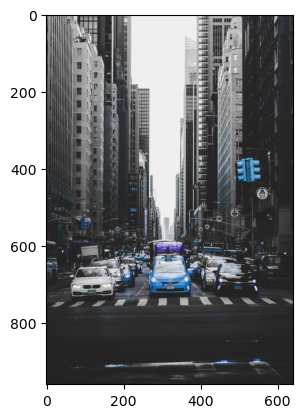

In [21]:
image = skimage.img_as_float(img)
plt.imshow(image)


In [22]:
ClassIndex , confidece, bbox = model.detect(img, confThreshold=0.5)

In [23]:
print(ClassIndex)


[ 3  3  3 10  3  3  3  3  3  3  3  3  3 10  1 10  3 10 10]


In [24]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
 #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
 #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = fon
    cv2.rectangle(img, boxes,(255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

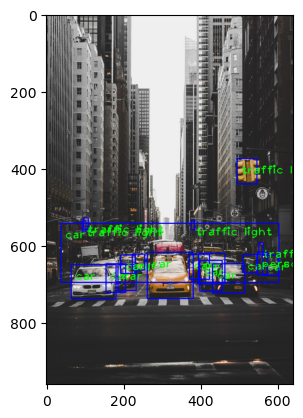

In [25]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
cv2.imwrite("test.JPG",img)

True